# **트레이딩 전략과 구현 6장 포트폴리오 이론**
**[파이썬 증권 데이터 분석 6장 | nbviewer](https://nbviewer.jupyter.org/github/INVESTAR/StockAnalysisInPython/tree/master/06_Trading_Strategy/)**
# **1 볼린저 밴드 지표**
표준 볼린저 밴드 공식
- 상단 볼린저 밴드 = 중간 볼린저 밴드 + (2 X 표준편차)
- 중단 볼린저 밴드 = 종가 20일 이동평균
- 하당 볼린저 밴드 = 중간 볼린저 밴드 - (2 X 표준편차)

## **01 데이터 불러오기**
**035420 | NAVER** 볼린저 밴드 분석하기

In [1]:
import os
import pandas as pd
file_save = "stock/boillinger.csv"
if os.path.isfile(file_save):
    data_df = pd.read_csv(file_save)
    data_df['Date'] = pd.to_datetime(data_df['Date']) # datetime 포맷 변경
    data_df = data_df.set_index('Date')
else:
    from FinanceDataReader import DataReader as fdr
    data_df = fdr("035420", "2019-01-01")
    data_df.to_csv(file_save)

data_df.columns = [_.lower() for _ in data_df.columns]
data_raw = data_df.copy()
data_df.tail(3)

,open,high,low,close,volume,change
Date,,,,,,
2021-05-04,366000,367000,360500,364500,398383,0.004132
2021-05-06,360500,364500,359500,361500,632873,-0.008230
2021-05-07,360500,364000,360000,361000,444578,-0.001383


In [2]:
# 볼린저 밴드 생성하기
data_df['MA20'] = data_df['close'].rolling(window=20).mean()  # 이동평균값
data_df['stddev'] = data_df['close'].rolling(window=20).std() # 각 표준편차
data_df['upper'] = data_df['MA20'] + (data_df['stddev'] * 2)  # 볼린저밴드 : 상단
data_df['lower'] = data_df['MA20'] - (data_df['stddev'] * 2)  # 볼린저밴드 : 하단
data_df = data_df[19:] 
data_df.head(3)

,open,high,low,close,volume,change,MA20,stddev,upper,lower
Date,,,,,,,,,,
2019-01-29,129999,136500,129999,136000,411369,0.030303,130425.0,4583.365231,139591.730462,121258.269538
2019-01-30,139000,139500,133000,136000,462280,0.000000,131325.0,3696.637875,138718.275750,123931.724250
2019-01-31,138000,143500,136000,136000,1054276,0.000000,132025.0,3118.176761,138261.353523,125788.646477


In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Loading ... Visualization Modules
import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)

from matplotlib.font_manager import fontManager as fm # 한글폰트 확인 및 추가
font_list_check  = ['D2Coding', 'NanumGothicCoding', 'NanumGothic']
for _ in font_list_check:
    font_counts = [f  for f in font_list_check if _ in [_.name for _ in fm.ttflist]]
    if len(font_counts) > 1: print(f"found : {_}"); plt.rc('font', family=_); break 

found : D2Coding


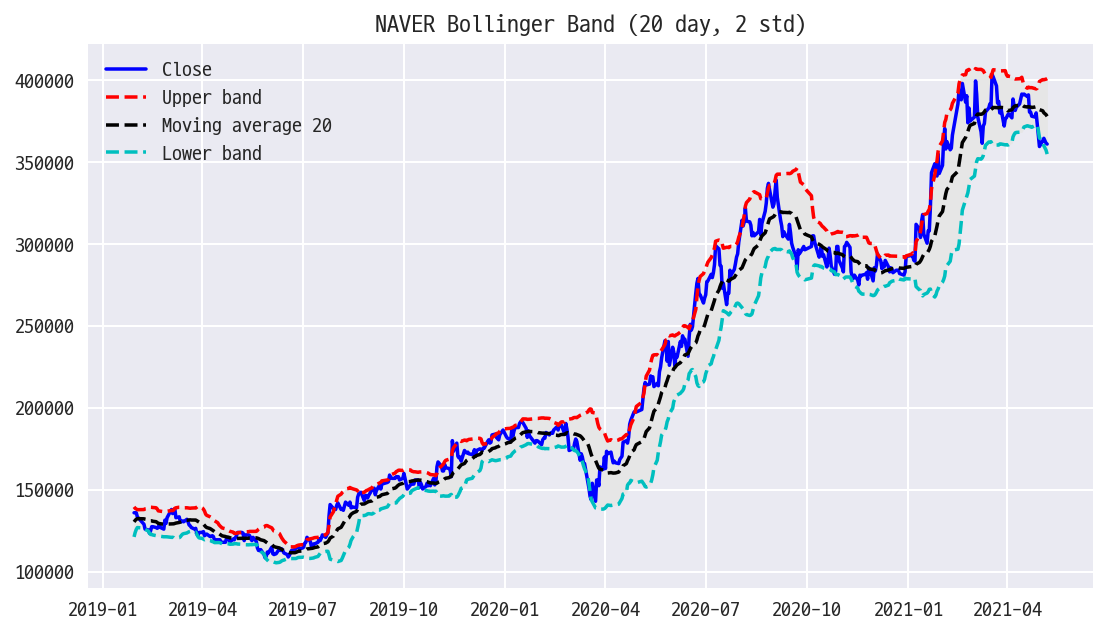

In [4]:
plt.figure(figsize=(9, 5))
plt.plot(data_df.index, data_df['close'], color='#0000ff', label='Close')    # ⑥
plt.plot(data_df.index, data_df['upper'], 'r--', label = 'Upper band')       # ⑦
plt.plot(data_df.index, data_df['MA20'], 'k--', label='Moving average 20')
plt.plot(data_df.index, data_df['lower'], 'c--', label = 'Lower band')
plt.fill_between(data_df.index, data_df['upper'], data_df['lower'], color='0.9')  # ⑧ 
plt.legend(loc='best')
plt.title('NAVER Bollinger Band (20 day, 2 std)')
plt.show()

## **02 볼린저 밴드 지표 | :%b**
**<span style="color:orange">종가</span>** 가 **<span style="color:orange">볼린저 밴드 어느 위치</span>** 에 있는지 확인하는 지표
- 1.0 (상단) \ 0.5 (중간) \ 0 (하단) : 
- ex> 1.1 : 볼린저 밴드보다 밴드폭의 10% 위에 위치

$$ \%b = {(종가 - 하단 볼린저 밴드) \over (상단 볼린저 밴드 - 중간 볼린저 밴드)}$$

In [5]:
%%time
data_df = data_raw.copy()
data_df['MA20'] = data_df['close'].rolling(window=20).mean() 
data_df['stddev'] = data_df['close'].rolling(window=20).std() 
data_df['upper'] = data_df['MA20'] + (data_df['stddev'] * 2)
data_df['lower'] = data_df['MA20'] - (data_df['stddev'] * 2)
data_df['PB'] = (data_df['close'] - data_df['lower']) / (data_df['upper'] - data_df['lower'])  # ①
data_df = data_df[19:]

CPU times: user 2.67 ms, sys: 2.74 ms, total: 5.41 ms
Wall time: 4.29 ms


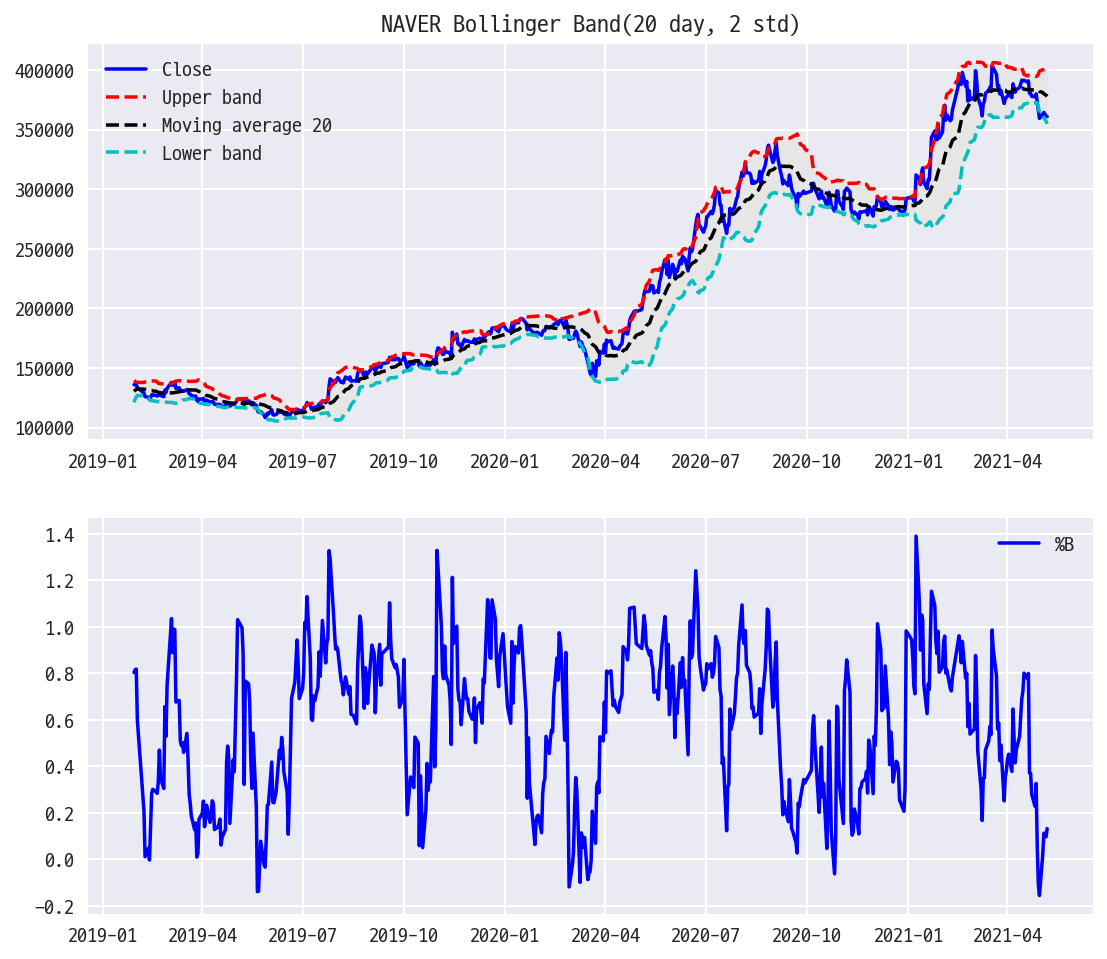

In [6]:
plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)  # ②
plt.plot(data_df.index, data_df['close'], color='#0000ff', label='Close')
plt.plot(data_df.index, data_df['upper'], 'r--', label = 'Upper band')
plt.plot(data_df.index, data_df['MA20'], 'k--', label='Moving average 20')
plt.plot(data_df.index, data_df['lower'], 'c--', label = 'Lower band')
plt.fill_between(data_df.index, data_df['upper'], data_df['lower'], color='0.9')
plt.title('NAVER Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')

plt.subplot(2, 1, 2)  # ③
plt.plot(data_df.index, data_df['PB'], color='b', label='%B')  # ④
plt.grid(True)
plt.legend(loc='best')
plt.show()

## **03 볼린저 밴드 지표 || :밴드폭**
- 볼린저 밴드의 **<span style="color:orange">상단/ 하단의 폭</span>** 을 계산한다
- 밴드의 폭이 **<span style="color:orange">6개월 기준 최저점이 스퀴즈</span>** 임을 파악 가능하다

$$ 밴드폭 = 100 X {(상단 볼린저 밴드 - 하단 볼린저 밴드) \over (중간 볼린저 밴드)}$$

$$ x = \dfrac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$

In [7]:
%%time
data_df = data_raw.copy()
data_df['MA20'] = data_df['close'].rolling(window=20).mean()
data_df['stddev'] = data_df['close'].rolling(window=20).std()
data_df['upper'] = data_df['MA20'] + (data_df['stddev'] * 2)
data_df['lower'] = data_df['MA20'] - (data_df['stddev'] * 2)
data_df['bandwidth'] = (data_df['upper'] - data_df['lower']) / data_df['MA20'] * 100 # ①
data_df = data_df[19:]

CPU times: user 7.44 ms, sys: 0 ns, total: 7.44 ms
Wall time: 5.78 ms


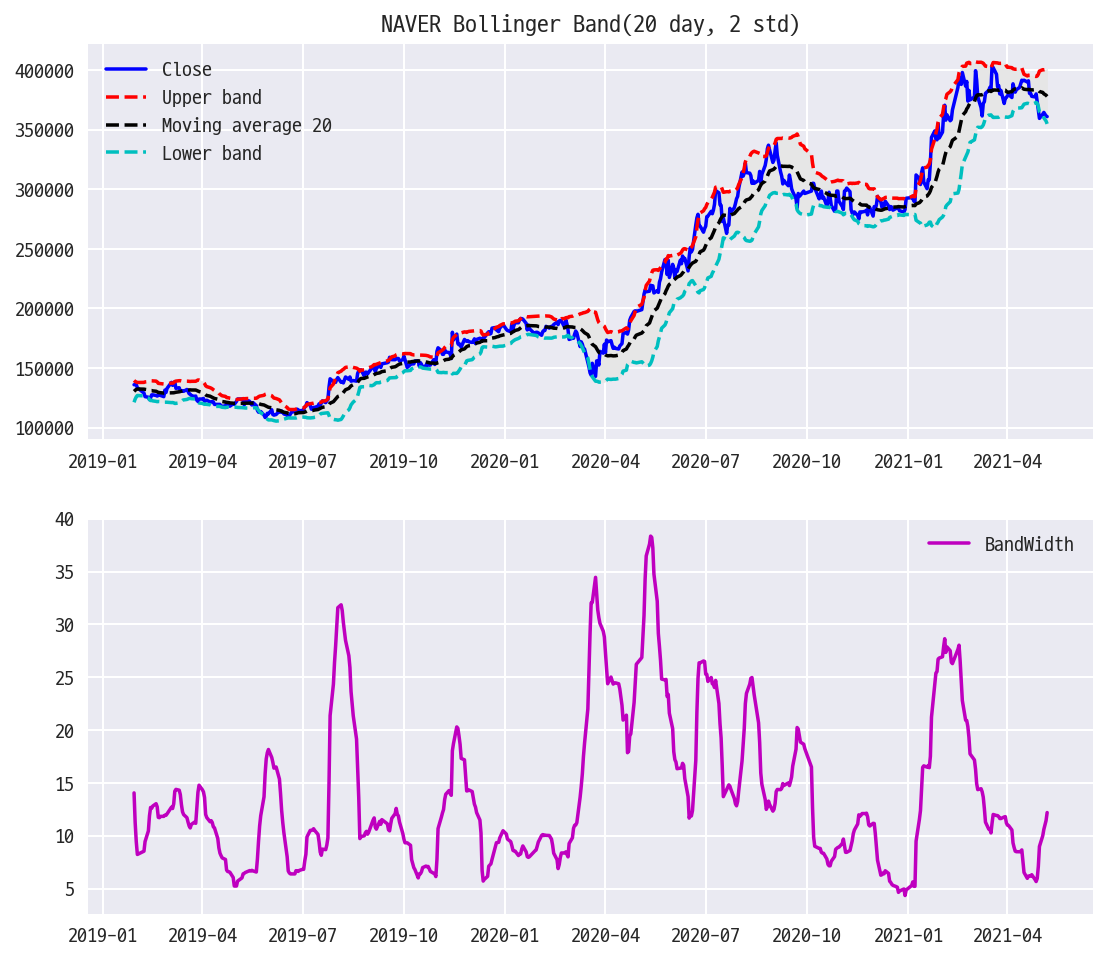

In [8]:
plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)
plt.plot(data_df.index, data_df['close'], color='#0000ff', label='Close')
plt.plot(data_df.index, data_df['upper'], 'r--', label ='Upper band')
plt.plot(data_df.index, data_df['MA20'], 'k--', label='Moving average 20')
plt.plot(data_df.index, data_df['lower'], 'c--', label ='Lower band')
plt.fill_between(data_df.index, data_df['upper'], data_df['lower'], color='0.9')
plt.title('NAVER Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')
plt.subplot(2, 1, 2)
plt.plot(data_df.index, data_df['bandwidth'], color='m', label='BandWidth') # ②
plt.grid(True)
plt.legend(loc='best')
plt.show()